#### 初始化

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import pickle as pk
import numpy as np
from collections import defaultdict
import time
from res_manager import ResultManager

In [259]:
def plot_durations(y, title_list):
    plot_count = len(title_list)
    for idx, title in enumerate(title_list):
        plt.subplot(plot_count, 1, idx + 1)
        plt.plot(y[idx, :],'.')
        plt.ylabel(title)
    plt.show()

In [189]:
def evaluation_framework(dnim_on_imagenet,smooth_window = 30):
#     smooth_window = 30
    dnim_on_imagenet = dnim_on_imagenet
    fine_grain_accs = dnim_on_imagenet['accuracy']
    fine_grain_probs = dnim_on_imagenet['explor_rate']
    fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
    fine_grain_refsizes = dnim_on_imagenet['ref_size']
    def list_split(l, size):
        return [l[m:m + size] for m in range(0, len(l), size)]
    aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
    aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
    aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
    aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

    norm_sizes = np.array(aver_sizes) / 200000
    norm_refsizes = np.array(aver_ref_sizes) / 150000

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # r1 = ax.fill_between(x=[i for i in np.arange(0,26,1)], y1=norm_refsizes[:26], y2=1.8, color='oldlace', label="inference")
    # r2 = ax.fill_between(x=[i for i in np.arange(25,56,1)], y1=retrain_y1, y2=1.8, color='oldlace', label="inference")
    # r3 = ax.fill_between(x=[i for i in np.arange(55,114,1)], y1=norm_refsizes[55:], y2=1.8, color='oldlace', label="inference")

    # r1 = ax.fill_betweenx(x1=0, x2=740 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
    # r2 = ax.fill_betweenx(x1=741 / smooth_window, x2=1670 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
    # r3 = ax.fill_betweenx(x1=1671 / smooth_window, x2=3097 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

    # r1 = ax.fill_betweenx(x1=0, x2=926 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
    # r2 = ax.fill_betweenx(x1=927 / smooth_window, x2=1879 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
    # r3 = ax.fill_betweenx(x1=1880 / smooth_window, x2=3440 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

    r1 = ax.fill_betweenx(x1=0, x2=890 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
    r2 = ax.fill_betweenx(x1=891 / smooth_window, x2=1860 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
    r3 = ax.fill_betweenx(x1=1861 / smooth_window, x2=3440 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

    l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

    num1 = len(aver_accs)
    rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
    rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

    ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
    ax.set_ylim(0, 1.1)
    ax.set_yticks(ax.get_yticks()[3:-1])

    ax2 = ax.twinx()
    l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
    ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
    ax2.set_ylim(-0.7, 1.1)
    ax2.set_yticks(ax2.get_yticks()[4:-1])

    # ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
    ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

    plt.xlim(0, 113)
    ax2.set_xlabel("steps")

    # ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
    # ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
    ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
    ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

    plt.setp(ax2.get_xticklabels(), rotation=90)

    fig.legend([r1, r2, rs1, rs2] + l1 + l2,
               ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"],
               loc=8, ncol=3)

    plt.subplots_adjust(top=1.0,
                        bottom=0.33,
                        left=0.105,
                        right=0.91,
                        hspace=0.2,
                        wspace=0.2)
    plt.show()

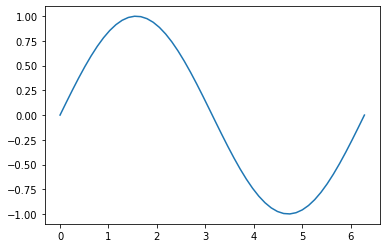

In [4]:
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [4]:
rm = ResultManager('evaluation_results')
rm.print_meta_info()

+---------+------------------------------------------+--------------+-------------+----------+
| Data ID |                   Name                   |    Topic     |     Type    | Versions |
+---------+------------------------------------------+--------------+-------------+----------+
|    1    |            eval_face_imagenet            |  AgentTrain  | defaultdict |    1     |
|    2    |          DNIM_agent_on_imagenet          | AgentRetrain | defaultdict |    1     |
|    3    |            DNIM_agent_initial            | AgentRetrain | defaultdict |    1     |
|    4    |            DNIM_agent_retrain            | AgentRetrain | defaultdict |    1     |
|    5    |         DNIM_agent_retrain_baidu         | AgentRetrain | defaultdict |    1     |
|    6    |         DNIM_agent_initial_baidu         | AgentRetrain | defaultdict |    1     |
|    7    |   baidu_initial_DNIM_retrain_imagenet    | AgentRetrain | defaultdict |    1     |
|    8    |  baidu_inference_DNIM_retrain_imagenet

#### 推断过程

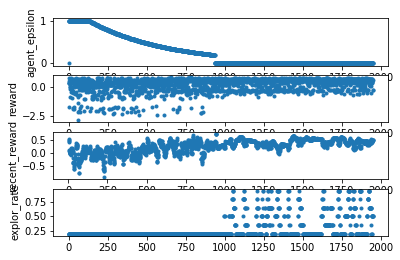

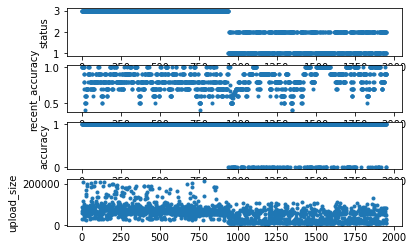

In [25]:
reload = rm.load(19)
initial_log = reload
plot_keys = ['agent_epsilon','reward', 'recent_reward', 'explor_rate']
plot_durations(np.array([initial_log[key] for key in plot_keys]),
               title_list=plot_keys)
plot_keys = ['status', 'recent_accuracy', 'accuracy', 'upload_size']
plot_durations(np.array([initial_log[key] for key in plot_keys]),
               title_list=plot_keys)

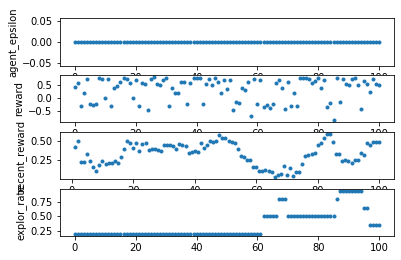

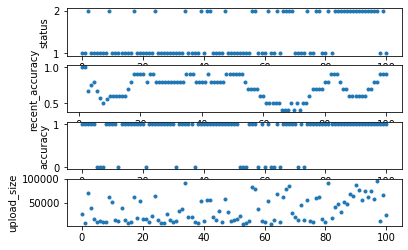

In [24]:
reload = rm.load(20)
initial_log = reload
plot_keys = ['agent_epsilon','reward', 'recent_reward', 'explor_rate']
plot_durations(np.array([initial_log[key] for key in plot_keys]),
               title_list=plot_keys)
plot_keys = ['status', 'recent_accuracy', 'accuracy', 'upload_size']
plot_durations(np.array([initial_log[key] for key in plot_keys]),
               title_list=plot_keys)

101

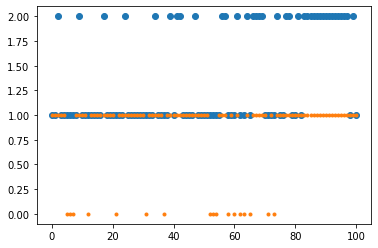

In [70]:
num = 20
dnim_on_imagenet = rm.load(num)
accuracy = dnim_on_imagenet['accuracy']
state = dnim_on_imagenet['status']
m = 50
# plt.plot(state[m:3*m],'o')
# plt.plot(accuracy[m:3*m],'.')
# plt.plot(state[:50],'o')
# plt.plot(accuracy[:50],'.')
# plt.plot(state[50:100],'o')
# plt.plot(accuracy[50:100],'.')
plt.plot(state,'o')
plt.plot(accuracy,'.')
len(accuracy)

#### 检查准确率

In [27]:
num = 19
dnim_on_imagenet = rm.load(num)
recent_accuracy = rm.load(num)['recent_accuracy']
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
len(recent_accuracy)

1951

In [23]:
accuracy.count(0)

134

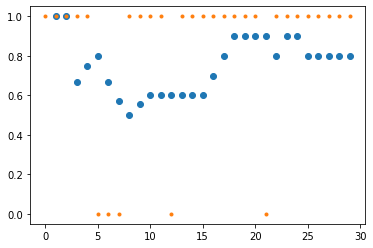

In [60]:
m =10
plt.plot(recent_accuracy[:3*m],'o')
plt.plot(accuracy[:3*m],'.')

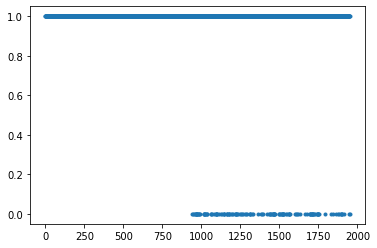

In [21]:
plt.plot(accuracy,'.')

In [30]:
smooth_window = 80
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]
len(aver_accs)

25

(0, 1.1)

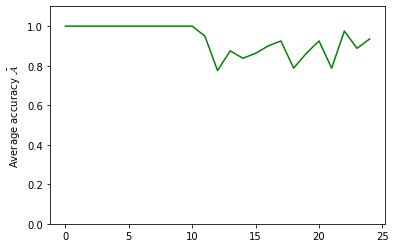

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")
ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)

#### 评估框架

num1  66


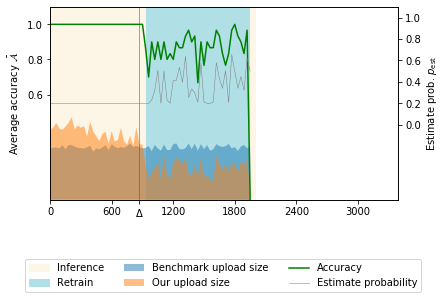

In [84]:
smooth_window = 30
dnim_on_imagenet = rm.load(19)
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) / 200000
norm_refsizes = np.array(aver_ref_sizes) / 150000

fig = plt.figure()
smooth_window = 30
ax = fig.add_subplot(111)


r1 = ax.fill_betweenx(x1=0, x2=936 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=937 / smooth_window, x2=1950 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=1951 / smooth_window, x2=2000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
print("num1 ",num1)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

plt.xlim(0, 113)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2, 
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"], 
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)

num1  67


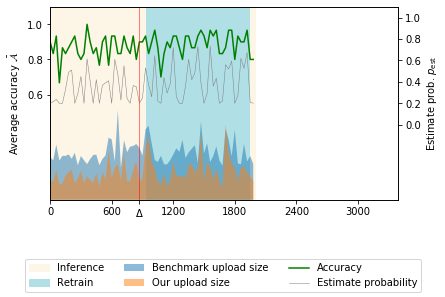

In [60]:
smooth_window = 30
dnim_on_imagenet = rm.load(22)
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

# norm_sizes = np.array(aver_sizes) / 200000
# norm_refsizes = np.array(aver_ref_sizes) / 150000
norm_sizes = np.array(aver_sizes) / 200000
norm_refsizes = np.array(aver_ref_sizes) / 150000

fig = plt.figure()
smooth_window = 30
ax = fig.add_subplot(111)


r1 = ax.fill_betweenx(x1=0, x2=936 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=937 / smooth_window, x2=1950 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=1951 / smooth_window, x2=2000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
print("num1 ",num1)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

plt.xlim(0, 113)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2, 
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"], 
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)

num1  40


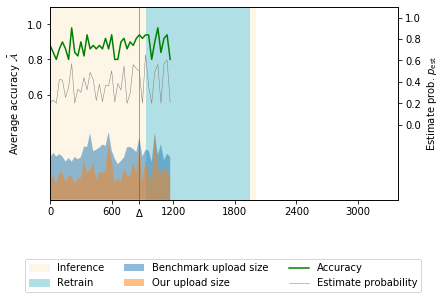

In [61]:
smooth_window = 50
dnim_on_imagenet = rm.load(22)
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) / 200000
norm_refsizes = np.array(aver_ref_sizes) / 150000

fig = plt.figure()
smooth_window = 30
ax = fig.add_subplot(111)


r1 = ax.fill_betweenx(x1=0, x2=936 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=937 / smooth_window, x2=1950 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=1951 / smooth_window, x2=2000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
print("num1 ",num1)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

plt.xlim(0, 113)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2, 
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"], 
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)

num1  58


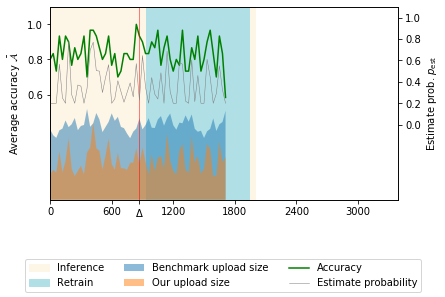

In [43]:
smooth_window = 30
dnim_on_imagenet = rm.load(23)
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) / 200000
norm_refsizes = np.array(aver_ref_sizes) / 150000

fig = plt.figure()
smooth_window = 30
ax = fig.add_subplot(111)


r1 = ax.fill_betweenx(x1=0, x2=936 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=937 / smooth_window, x2=1950 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=1951 / smooth_window, x2=2000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
print("num1 ",num1)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

plt.xlim(0, 113)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2, 
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"], 
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)

num1  29


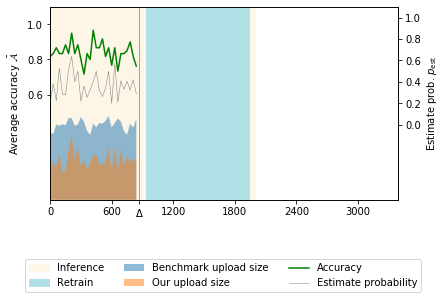

In [86]:
smooth_window = 60
dnim_on_imagenet = rm.load(23)
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) / 200000
norm_refsizes = np.array(aver_ref_sizes) / 150000

fig = plt.figure()
smooth_window = 30
ax = fig.add_subplot(111)


r1 = ax.fill_betweenx(x1=0, x2=936 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=937 / smooth_window, x2=1950 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=1951 / smooth_window, x2=2000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
print("num1 ",num1)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

plt.xlim(0, 113)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2, 
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"], 
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)

num1  34


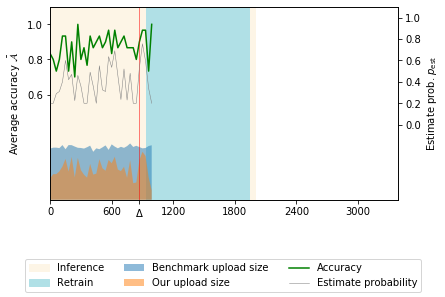

In [72]:
smooth_window = 30
dnim_on_imagenet = rm.load(24)
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) / 200000
norm_refsizes = np.array(aver_ref_sizes) / 150000

fig = plt.figure()
smooth_window = 30
ax = fig.add_subplot(111)


r1 = ax.fill_betweenx(x1=0, x2=936 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=937 / smooth_window, x2=1950 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=1951 / smooth_window, x2=2000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
print("num1 ",num1)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=29, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

plt.xlim(0, 113)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2, 
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"], 
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)

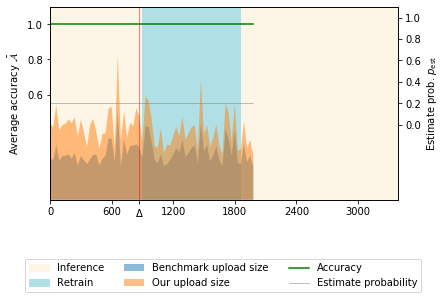

In [98]:
evaluation_framework(rm.load(25),smooth_window = 30)

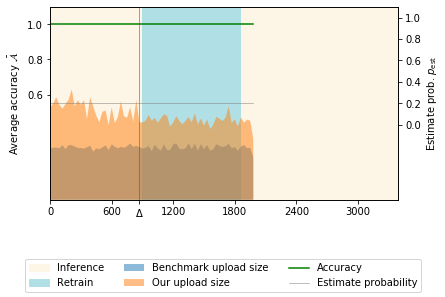

In [99]:
evaluation_framework(rm.load(26),smooth_window = 30)

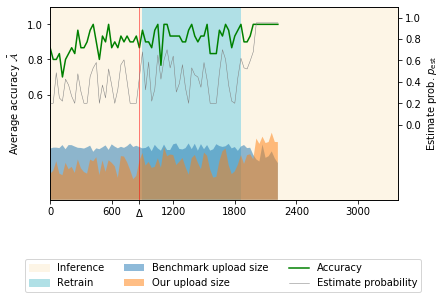

In [190]:
evaluation_framework(rm.load(27),smooth_window = 30)

#### rm(28)整个框架过程 

In [194]:
1841/80

23.0125

In [195]:
3500/80

43.75

In [188]:
x_length = 7000 / 80
print(x_length)
len(norm_sizes)

87.5


88

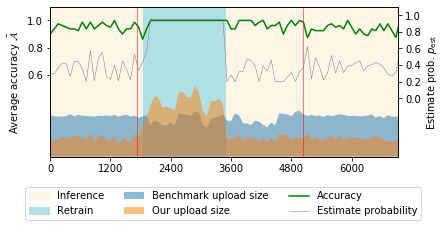

In [291]:
dnim_on_imagenet = rm.load(28)
smooth_window = 80
dnim_on_imagenet = dnim_on_imagenet
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) 
norm_sizes_retrain = norm_sizes[23:44] / 170000
norm_sizes = norm_sizes / 280000
norm_sizes[23:44] = norm_sizes_retrain
norm_refsizes = np.array(aver_ref_sizes) / 150000

aver_probs = np.array(aver_probs)
aver_probs[25:44]=0.95

aver_accs = np.array(aver_accs)
aver_accs[1:23]=aver_accs[1:23]+0.05
aver_accs[0:3]=aver_accs[0:3]+0.05
aver_accs[44:]=aver_accs[44:]+0.05
aver_accs[64:65]=aver_accs[64:65]-0.14
aver_accs[aver_accs>1]=1

fig = plt.figure()
ax = fig.add_subplot(111)



r1 = ax.fill_betweenx(x1=0, x2=1840 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=1841 / smooth_window, x2=3500 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=3501 / smooth_window, x2=7000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=21.5, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=63, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

x_length = 7000 / smooth_window
#     plt.xlim(0, 113)
plt.xlim(0, x_length-1)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
#     ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
#     ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])
#     ax2.set_xticks([0, 15,25, 30,45, 58,60,75, ])
#     ax2.set_xticklabels(["0","1200",r"$\Delta$", "2400","3600",r"$\Delta$","4800","6000"])
ax2.set_xticks([0, 15, 30,45,60,75, ])
ax2.set_xticklabels(["0","1200", "2400","3600","4800","6000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2,
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"],
           loc=8, ncol=3)

plt.subplots_adjust(top=0.75,
                    bottom=0.23,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)
plt.show()

####  dataset_change图

In [4]:
%matplotlib inline
%matplotlib qt5

In [5]:
running_log = rm.load(28)
running_log.keys()

dict_keys(['status', 'action', 'accuracy', 'agent_accuracy', 'ref_size', 'comp_size', 'upload_size', 'size_reward', 'reward', 'image_path', 'step_count', 'recent_reward', 'recent_accuracy', 'explor_rate', 'agent_epsilon'])

Text(0.5, 1.0, "Agent's actions")

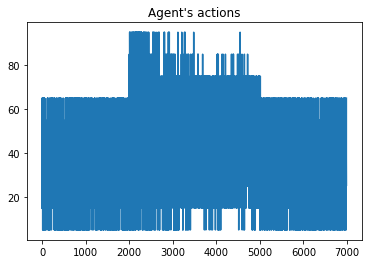

In [6]:
plt.plot(running_log['action'])
plt.title("Agent's actions")

In [7]:
len(running_log['action'])

6987

In [8]:
DNIM_actions = np.array(running_log['action'][:1400])
imagenet_actions = np.array(running_log['action'][3600:5000])

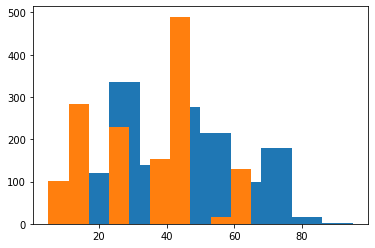

In [9]:
imagenet_hist = plt.hist(imagenet_actions, bins=10)
DNIM_hist = plt.hist(DNIM_actions, bins=10)

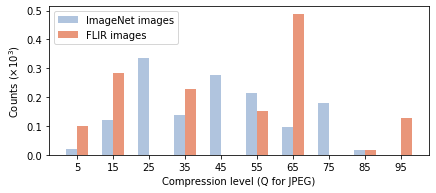

In [44]:
plt.bar([i - 1.5 for i in np.arange(5, 105, 10)], np.array(imagenet_hist[0]) / 1000, width=3, label='ImageNet images', color='lightsteelblue')
plt.bar([i + 1.5 for i in np.arange(5, 105, 10)], np.array(DNIM_hist[0]) / 1000, width=3, label='FLIR images', color='darksalmon')
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.legend()

plt.subplots_adjust(top=0.75,
                    bottom=0.235,
                    left=0.115,
                    right=0.995,
                    hspace=0.2,
                    wspace=0.2)
# plt.subplots_adjust(top=0.75,
#                     bottom=0.23,
#                     left=0.105,
#                     right=0.91,
#                     hspace=0.2,
#                     wspace=0.2)
# plt.tight_layout()
# plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.2, wspace=0.3)
plt.savefig('dataset_change1.png',dpi=600)
plt.show()

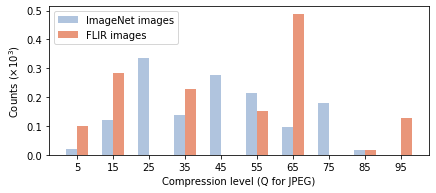

In [35]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('dataset_change1.pdf')
plt.figure() 

plt.bar([i - 1.5 for i in np.arange(5, 105, 10)], np.array(imagenet_hist[0]) / 1000, width=3, label='ImageNet images', color='lightsteelblue')
plt.bar([i + 1.5 for i in np.arange(5, 105, 10)], np.array(DNIM_hist[0]) / 1000, width=3, label='FLIR images', color='darksalmon')
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.75,
                    bottom=0.235,
                    left=0.115,
                    right=0.995,
                    hspace=0.2,
                    wspace=0.2)
# f.set_figheight(15)
# f.set_figwidth(15)
# plt.show()
# plt.tight_layout()
pdf.savefig()
plt.show()
plt.close()
pdf.close()

In [ ]:
imagenet_actions = np.array(running_log['action'][:720])
DNIM_actions = np.array(running_log['action'][1670:])

#### rm(29) iamge-FLIR-image过程 

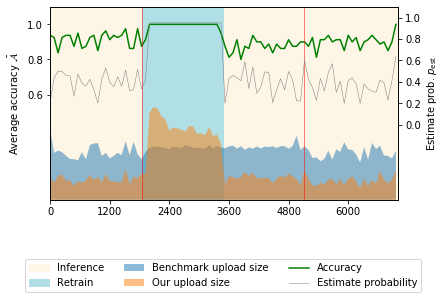

In [223]:
dnim_on_imagenet = rm.load(29)
smooth_window = 80
dnim_on_imagenet = dnim_on_imagenet
fine_grain_accs = dnim_on_imagenet['accuracy']
fine_grain_probs = dnim_on_imagenet['explor_rate']
fine_grain_sizes = dnim_on_imagenet['upload_size']#[:1670] + dnim_on_imagenet['comp_size'][1670:]
fine_grain_refsizes = dnim_on_imagenet['ref_size']
def list_split(l, size):
    return [l[m:m + size] for m in range(0, len(l), size)]
aver_accs = [np.mean(item) for item in list_split(fine_grain_accs, smooth_window)]
aver_probs = [np.mean(item) for item in list_split(fine_grain_probs, smooth_window)]
aver_sizes = [np.mean(item) for item in  list_split(fine_grain_sizes, smooth_window)]
aver_ref_sizes = [np.mean(item) for item in  list_split(fine_grain_refsizes, smooth_window)]

norm_sizes = np.array(aver_sizes) 
norm_sizes_retrain = norm_sizes[23:44] / 170000
norm_sizes = norm_sizes / 280000
norm_sizes[23:44] = norm_sizes_retrain
norm_refsizes = np.array(aver_ref_sizes) / 150000

aver_probs = np.array(aver_probs)
aver_probs[25:44]=0.95

fig = plt.figure()
ax = fig.add_subplot(111)



r1 = ax.fill_betweenx(x1=0, x2=1840 / smooth_window, y=[-0.4,1.8], color='oldlace', label="inference")
r2 = ax.fill_betweenx(x1=1841 / smooth_window, x2=3500 / smooth_window, y=[-0.4, 1.8], color='powderblue', label="retrain")
r3 = ax.fill_betweenx(x1=3501 / smooth_window, x2=7000 / smooth_window, y=[-0.4, 1.8], color='oldlace', label="inference")

l1 = ax.plot(aver_accs, label=r"recent average accuracy $\bar{\mathcal{A}_t}$", color="green")

num1 = len(aver_accs)
rs1 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_refsizes, alpha=0.5, label="ref_size")
rs2 = ax.fill_between(x=[i for i in range(num1)], y1=0, y2=norm_sizes, alpha=0.5, label="upload_size")

ax.set_ylabel(r"Average accuracy $\bar{\mathcal{A}}$")
ax.set_ylim(0, 1.1)
ax.set_yticks(ax.get_yticks()[3:-1])

ax2 = ax.twinx()
l2 = ax2.plot(aver_probs, label=r"estimation probability $p_{\rm est}$", color="gray", linewidth=0.5)
ax2.set_ylabel(r"Estimate prob. $p_{\rm est}$")
ax2.set_ylim(-0.7, 1.1)
ax2.set_yticks(ax2.get_yticks()[4:-1])

# ax2.vlines(x=24, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=23, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')
ax2.vlines(x=64, ymin=-0.7, ymax=1.8, linestyles='-', linewidth=0.5, color='r')

x_length = 7000 / smooth_window
#     plt.xlim(0, 113)
plt.xlim(0, x_length)
ax2.set_xlabel("steps")

# ax2.set_xticks([0, 20, 24, 40, 60, 80, 100, 110])
# ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000","3300"])
#     ax2.set_xticks([0, 20, 29, 40, 60, 80, 100])
#     ax2.set_xticklabels(["0", "600", r"$\Delta$", "1200", "1800", "2400", "3000"])
#     ax2.set_xticks([0, 15,25, 30,45, 58,60,75, ])
#     ax2.set_xticklabels(["0","1200",r"$\Delta$", "2400","3600",r"$\Delta$","4800","6000"])
ax2.set_xticks([0, 15, 30,45,60,75, ])
ax2.set_xticklabels(["0","1200", "2400","3600","4800","6000"])

plt.setp(ax2.get_xticklabels(), rotation=90)

fig.legend([r1, r2, rs1, rs2] + l1 + l2,
           ["Inference", "Retrain", "Benchmark upload size", "Our upload size", "Accuracy", "Estimate probability"],
           loc=8, ncol=3)

plt.subplots_adjust(top=1.0,
                    bottom=0.33,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)
plt.show()

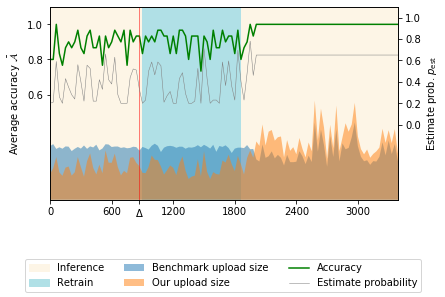

In [193]:
evaluation_framework(rm.load(28),smooth_window = 30)

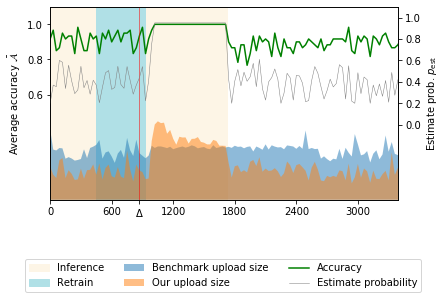

In [115]:
evaluation_framework(rm.load(29),smooth_window = 60)

#### ppt汇报的工作

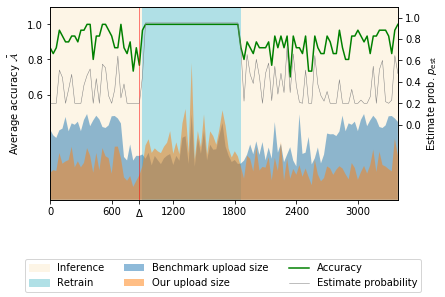

In [192]:
evaluation_framework(rm.load(17))

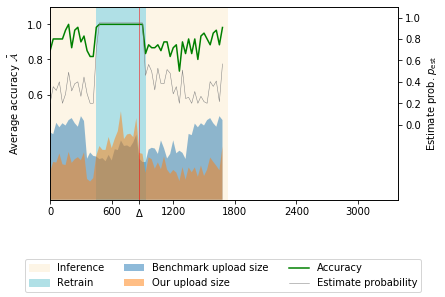

In [82]:
evaluation_framework(rm.load(17))

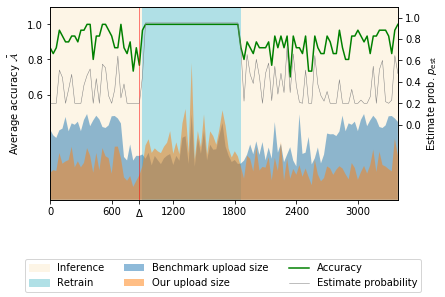

In [76]:
evaluation_framework(rm.load(17))